7PAM2002-0901-2024 - MSc Data Science Project

Topic - Comparing Data Augmentation Methods – Easy Data Augmentation and Back Translation for text(Intentation) Classification using Recurrent Neural Network.

Research Question - Which data augmentation methods applied on a small dataset outperform models trained without augmentation in terms of accuracy and precision in case of intention(text) classification using LSTM as training models, and by how much do they improve performance?

Supervisor - Dr. Man Lai Tang

Done by - Mohit Agarwal (22031257)

Importing Packages

In [1]:
# importing required packages...
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import os

In [2]:
# appending the location for augment modules
import sys
sys.path.append(r"D:\MScDataScience\7.Data_Science_Project\SourceCode\Agument")
# appending the location for modles modules
sys.path.append(r"D:\MScDataScience\7.Data_Science_Project\SourceCode\Models")

In [3]:
# importing modules from local drives...
import preprocess_eda as preprocess
import lstm
import train_lstm
import back_translation
import eda

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\agarw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# setiing plot style
plt.style.use("seaborn-v0_8-darkgrid")

In [5]:
# path for lstm model with tuned hyperparameter
hp_path = r"D:\MScDataScience\7.Data_Science_Project\Model_Callbacks"
# path for under & overfitting graphs
valuation_path = r"D:\MScDataScience\7.Data_Science_Project\SourceCode\Plots\Overfitting_Underfitting"

Loading the data 

The length of the training data:  7500
The length of the testing data:  4500
The length of the validation data:  3000


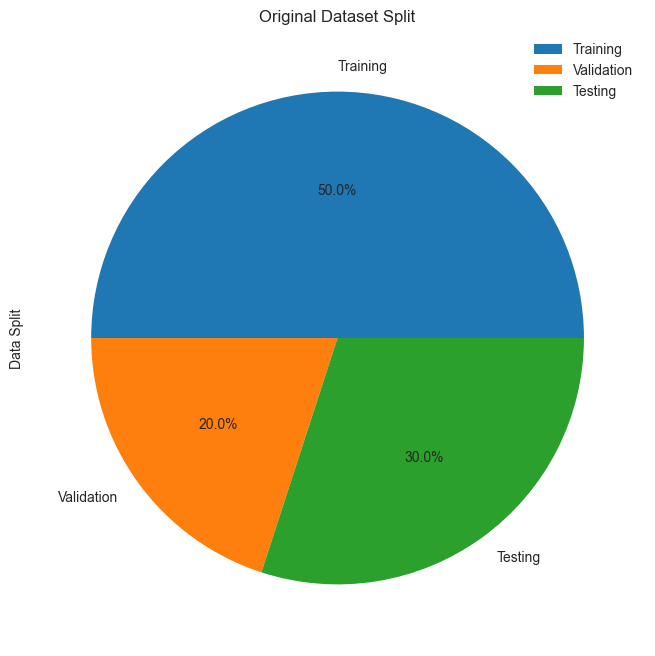

In [6]:
preprocess.records_per_set(train=preprocess.train_df,
                           val=preprocess.val_df,
                           test=preprocess.test_df,
                           title="Original Dataset Split")

Exploratory Data Analysis

[INFO] Minimum Number of Charaters in a query is:  3
[INFO] Maximum Number of Charaters in a query is:  136


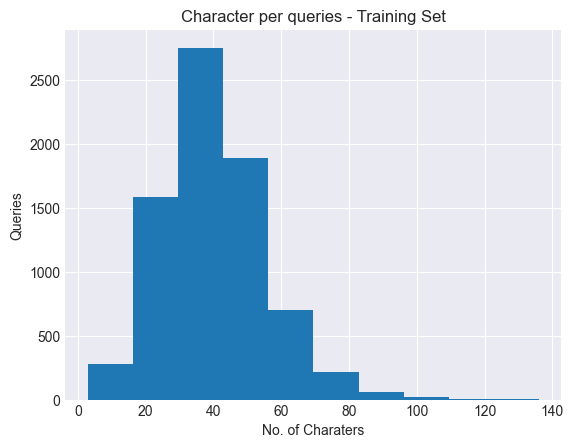

[INFO] Minimum Number of Words in a query is:  1
[INFO] Maximum Number of Words in a query is:  28


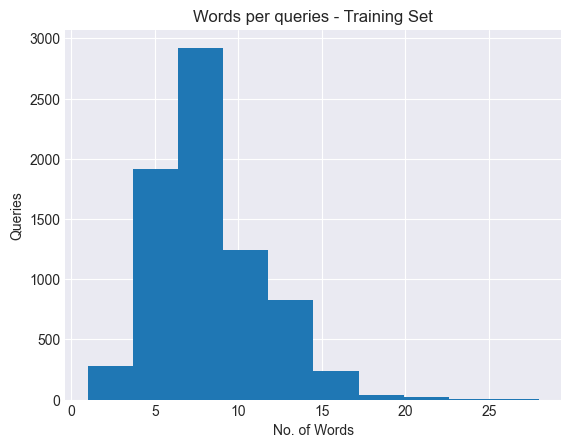

[INFO] Minimum Number of Average Words Length in a query is:  1.8
[INFO] Maximum Number of Average Words Length in a query is:  11.0


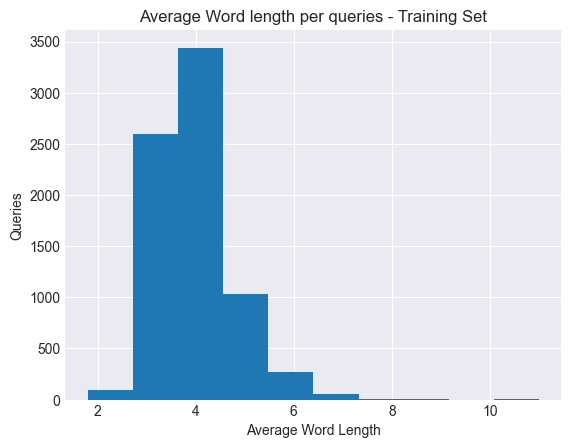


[INFO] Creating 20 Highest Frequency Words for all Classes...
	Created & Saved.

[INFO] Creating WordCloud for all classes...
	Created & Saved.


In [7]:
# exploring the training data
train_explore = preprocess.eda(data=preprocess.train_df,
                               path=r"D:\MScDataScience\7.Data_Science_Project\SourceCode\Plots\Training")
# plotting number of character per record
train_explore.char_per_query(title="Training Set")
# plotting number of words per record
train_explore.word_per_query(title="Training Set")
# plotting average word length per record
train_explore.avg_word_len_per_query(title="Training Set")
# line graph of word frequency per class
train_word_freq_dict = train_explore.word_freq_per_class(title="Training Set")
# worldcloud of word frequency per class
train_worldcloud_dict = train_explore.word_cloud_per_class(
    title="Training Set")

[INFO] Minimum Number of Charaters in a query is:  2
[INFO] Maximum Number of Charaters in a query is:  114


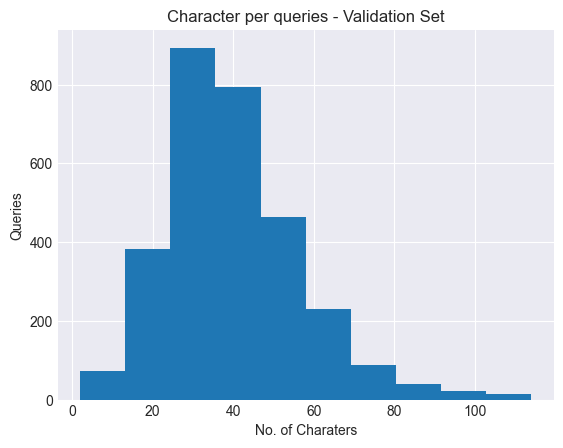

[INFO] Minimum Number of Words in a query is:  1
[INFO] Maximum Number of Words in a query is:  24


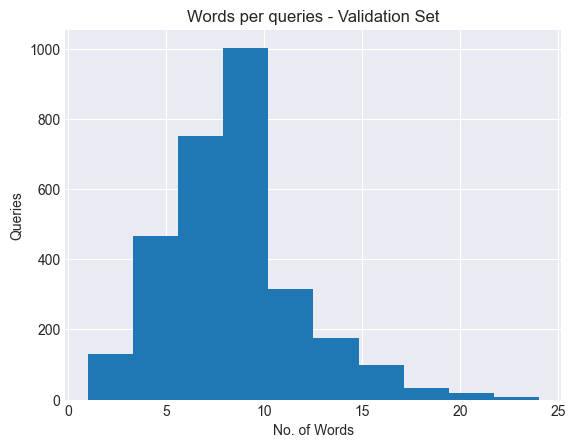

[INFO] Minimum Number of Average Words Length in a query is:  2.0
[INFO] Maximum Number of Average Words Length in a query is:  11.0


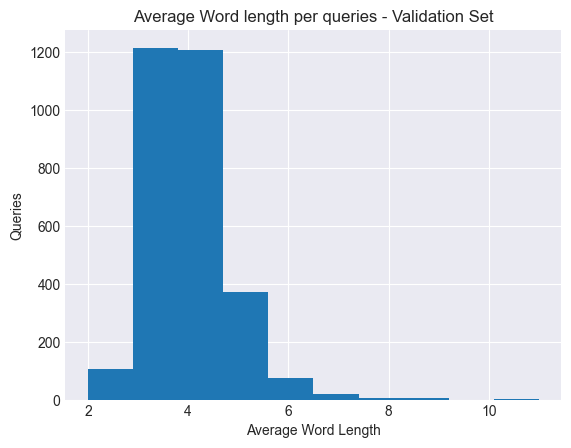


[INFO] Creating 20 Highest Frequency Words for all Classes...
	Created & Saved.

[INFO] Creating WordCloud for all classes...
	Created & Saved.


In [8]:
# exploring the validation data
val_explore = preprocess.eda(data=preprocess.val_df,
                             path=r"D:\MScDataScience\7.Data_Science_Project\SourceCode\Plots\Validation")
# plotting number of character per record
val_explore.char_per_query(title="Validation Set")
# plotting number of words per record
val_explore.word_per_query(title="Validation Set")
# plotting average word length per record
val_explore.avg_word_len_per_query(title="Validation Set")
# line graph of word frequency per class
val_word_freq_dict = val_explore.word_freq_per_class(title="Validation Set")
# worldcloud of word frequency per class
val_worldcloud_dict = val_explore.word_cloud_per_class(
    title="Validation Set")

[INFO] Minimum Number of Charaters in a query is:  2
[INFO] Maximum Number of Charaters in a query is:  125


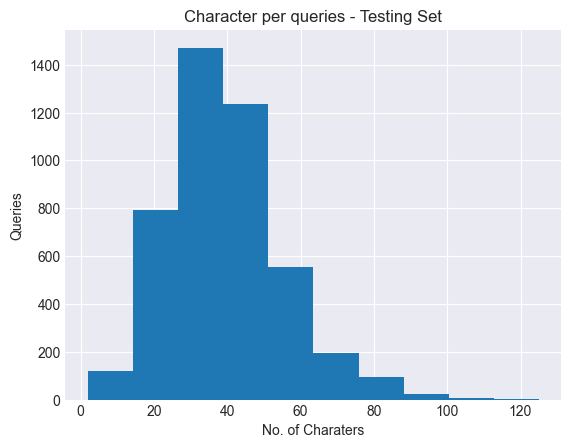

[INFO] Minimum Number of Words in a query is:  1
[INFO] Maximum Number of Words in a query is:  25


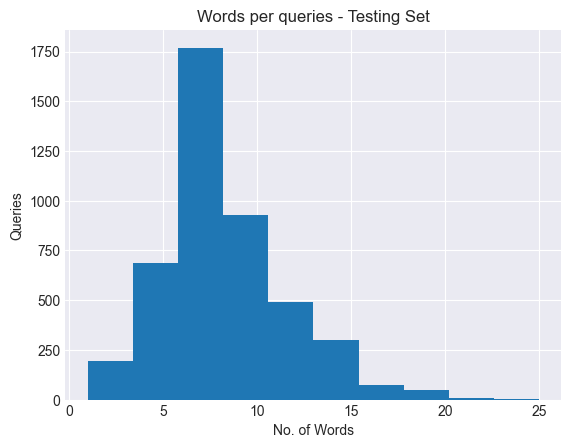

[INFO] Minimum Number of Average Words Length in a query is:  2.0
[INFO] Maximum Number of Average Words Length in a query is:  11.0


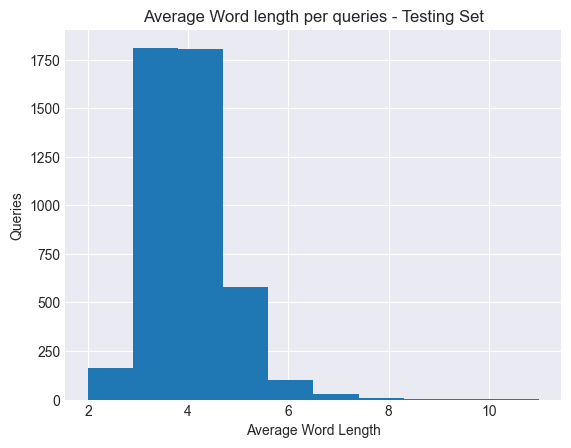


[INFO] Creating 20 Highest Frequency Words for all Classes...
	Created & Saved.

[INFO] Creating WordCloud for all classes...
	Created & Saved.


In [9]:
# exploring the testing data
test_explore = preprocess.eda(data=preprocess.test_df,
                              path=r"D:\MScDataScience\7.Data_Science_Project\SourceCode\Plots\Testing")
# plotting number of character per record
test_explore.char_per_query(title="Testing Set")
# plotting number of words per record
test_explore.word_per_query(title="Testing Set")
# plotting average word length per record
test_explore.avg_word_len_per_query(title="Testing Set")
# line graph of word frequency per class
test_word_freq_dict = test_explore.word_freq_per_class(title="Testing Set")
# worldcloud of word frequency per class
test_worldcloud_dict = test_explore.word_cloud_per_class(title="Testing Set")

Preprocessing the Data

In [6]:
# preprocessing the training set
train_preprocess = preprocess.pre_process(preprocess.train_df)
x_train = train_preprocess.preprocess()
# lemmentizing the preprocessed data
x_train = train_preprocess.lemmatise()

# encoding the classes to one-hot format
y_train = train_preprocess.encode_class()

In [7]:
# preprocessing the validation set
val_preprocess = preprocess.pre_process(preprocess.val_df)
x_val = val_preprocess.preprocess()
# lemmentizing the preprocessed data
x_val = val_preprocess.lemmatise()

# encoding the classes to one-hot format
y_val = val_preprocess.encode_class()

In [8]:
# preprocessing the testing set
test_preprocess = preprocess.pre_process(preprocess.test_df)
x_test = test_preprocess.preprocess()
# lemmentizing the preprocessed data
x_test = test_preprocess.lemmatise()

# encoding the classes to one-hot format
y_test = test_preprocess.encode_class()

Exploring the Processed Datasets

[INFO] Minimum Number of Charaters in a query is:  0
[INFO] Maximum Number of Charaters in a query is:  87


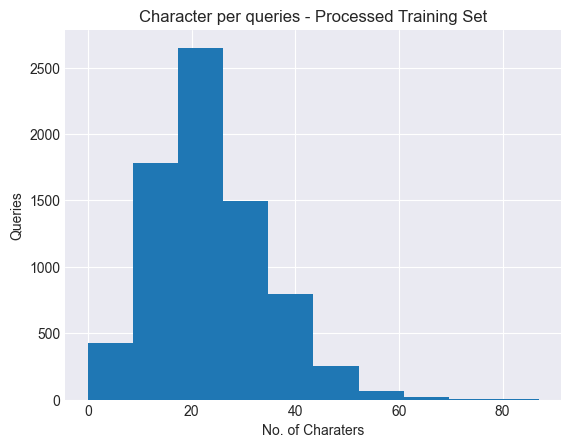

[INFO] Minimum Number of Words in a query is:  0
[INFO] Maximum Number of Words in a query is:  13


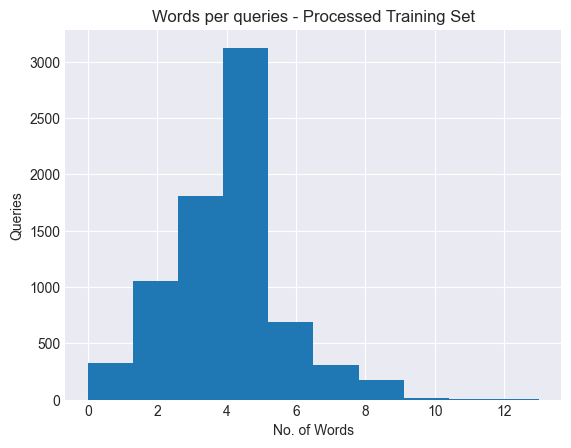

[INFO] Minimum Number of Average Words Length in a query is:  1.0
[INFO] Maximum Number of Average Words Length in a query is:  13.0


c:\Users\agarw\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\agarw\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


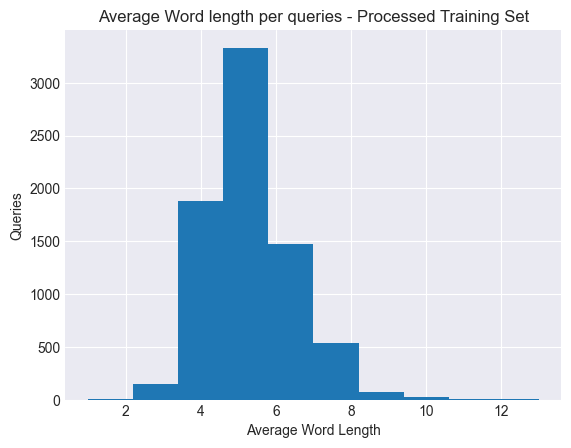


[INFO] Creating 20 Highest Frequency Words for all Classes...
	Created & Saved.

[INFO] Creating WordCloud for all classes...
	Created & Saved.


In [13]:
# creating processed training dataframe
processed_train_df = pd.DataFrame(({"Query": x_train,
                                    "Intent": preprocess.train_df.iloc[:, 1]}))
# exploring the processed training data
processed_train_explore = preprocess.eda(data=processed_train_df,
                                         path=r"D:\MScDataScience\7.Data_Science_Project\SourceCode\Plots\Processed\Training")
# plotting number of character per record
processed_train_explore.char_per_query(title="Processed Training Set")
# plotting number of words per record
processed_train_explore.word_per_query(title="Processed Training Set")
# plotting average word length per record
processed_train_explore.avg_word_len_per_query(title="Processed Training Set")
# line graph of word frequency per class
processed_train_word_freq_dict = processed_train_explore.word_freq_per_class(
    title="Processed Training Set")
# worldcloud of word frequency per class
processed_train_worldcloud_dict = processed_train_explore.word_cloud_per_class(
    title="Processed Training Set")

[INFO] Minimum Number of Charaters in a query is:  0
[INFO] Maximum Number of Charaters in a query is:  85


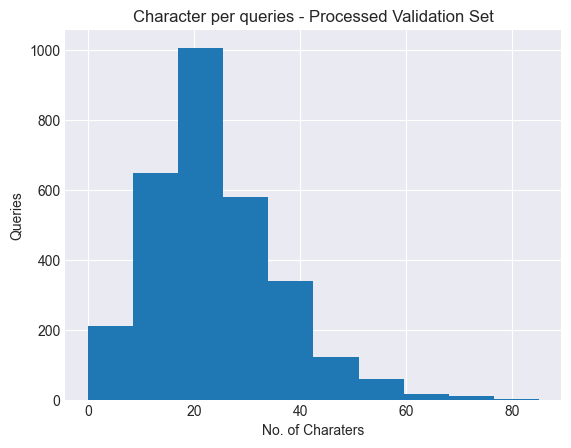

[INFO] Minimum Number of Words in a query is:  0
[INFO] Maximum Number of Words in a query is:  14


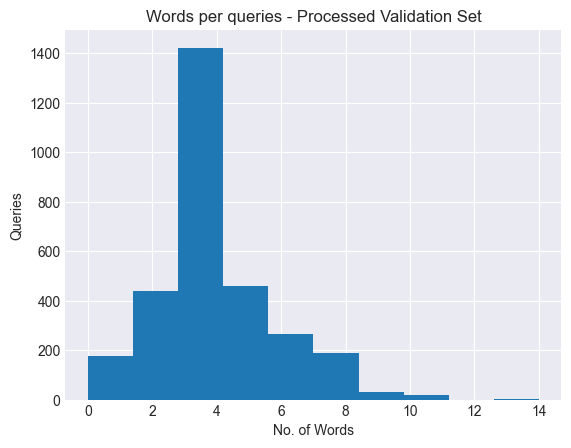

[INFO] Minimum Number of Average Words Length in a query is:  2.0
[INFO] Maximum Number of Average Words Length in a query is:  12.0


c:\Users\agarw\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\agarw\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


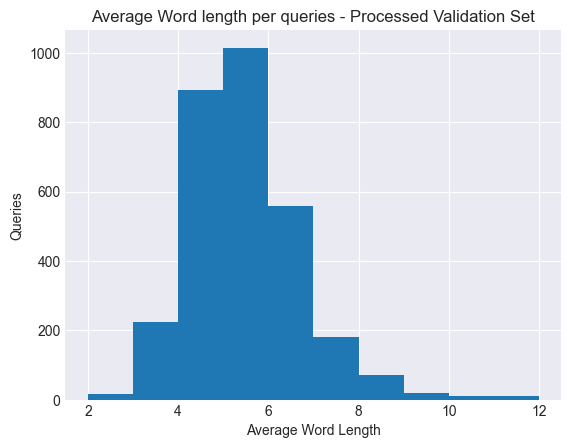


[INFO] Creating 20 Highest Frequency Words for all Classes...
	Created & Saved.

[INFO] Creating WordCloud for all classes...
	Created & Saved.


In [14]:
# creating processed validation dataframe
processed_val_df = pd.DataFrame(({"Query": x_val,
                                  "Intent": preprocess.val_df.iloc[:, 1]}))
# exploring the processed validation data
processed_val_explore = preprocess.eda(data=processed_val_df,
                                       path=r"D:\MScDataScience\7.Data_Science_Project\SourceCode\Plots\Processed\Validation")
# plotting number of character per record
processed_val_explore.char_per_query(title="Processed Validation Set")
# plotting number of words per record
processed_val_explore.word_per_query(title="Processed Validation Set")
# plotting average word length per record
processed_val_explore.avg_word_len_per_query(title="Processed Validation Set")
# line graph of word frequency per class
processed_val_word_freq_dict = processed_val_explore.word_freq_per_class(
    title="Processed Validation Set")
# worldcloud of word frequency per class
processed_val_worldcloud_dict = processed_val_explore.word_cloud_per_class(
    title="Processed Validation Set")

[INFO] Minimum Number of Charaters in a query is:  0
[INFO] Maximum Number of Charaters in a query is:  86


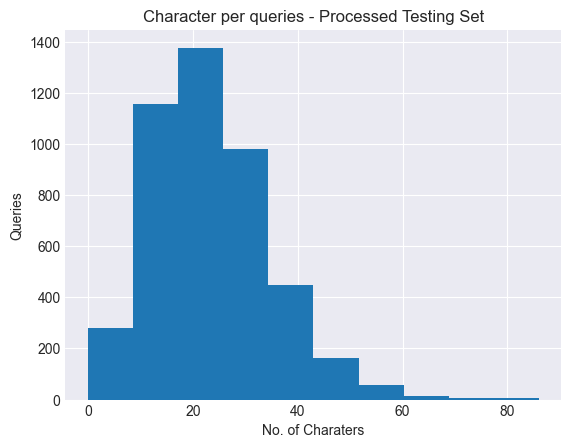

[INFO] Minimum Number of Words in a query is:  0
[INFO] Maximum Number of Words in a query is:  13


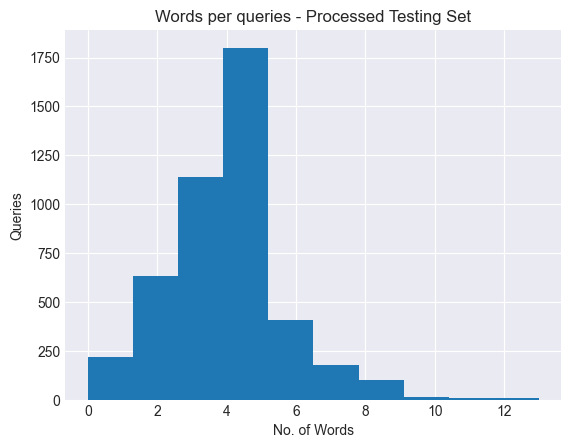

[INFO] Minimum Number of Average Words Length in a query is:  2.0
[INFO] Maximum Number of Average Words Length in a query is:  13.0


c:\Users\agarw\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\agarw\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


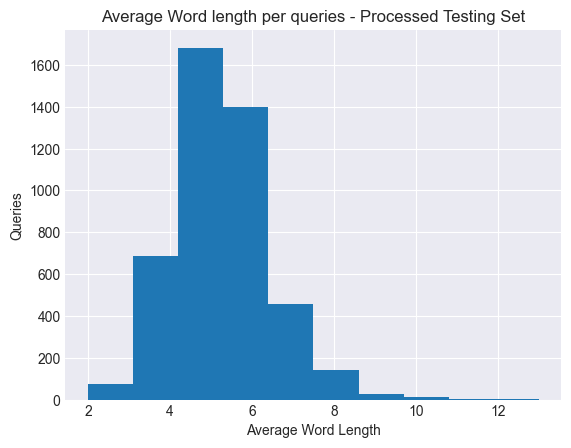


[INFO] Creating 20 Highest Frequency Words for all Classes...
	Created & Saved.

[INFO] Creating WordCloud for all classes...
	Created & Saved.


In [15]:
# creating processed testing dataframe
processed_test_df = pd.DataFrame(({"Query": x_test,
                                   "Intent": preprocess.test_df.iloc[:, 1]}))
# exploring the processed testing data
processed_test_explore = preprocess.eda(data=processed_test_df,
                                        path=r"D:\MScDataScience\7.Data_Science_Project\SourceCode\Plots\Processed\Testing")
# plotting number of character per record
processed_test_explore.char_per_query(title="Processed Testing Set")
# plotting number of words per record
processed_test_explore.word_per_query(title="Processed Testing Set")
# plotting average word length per record
processed_test_explore.avg_word_len_per_query(title="Processed Testing Set")
# line graph of word frequency per class
processed_test_word_freq_dict = processed_test_explore.word_freq_per_class(
    title="Processed Testing Set")
# worldcloud of word frequency per class
processed_test_worldcloud_dict = processed_test_explore.word_cloud_per_class(
    title="Processed Testing Set")

Creating a textvectorization layer using Keras

In [9]:
# setting vocabulary size
VOCAB_SIZE = 50000
# setting the oputput sequence length for textvector layer
SEQ_LEN = 25
# creating a keras text vector layer
textvector_layer = tf.keras.layers.TextVectorization(max_tokens=VOCAB_SIZE,
                                                     ngrams=(1, 2, 3),
                                                     output_mode="int",
                                                     output_sequence_length=SEQ_LEN)
# learning the vocabulary in the dataset from training data
textvector_layer.adapt(x_train)

Hypermodel Building and Optimizing for Single LSTM

In [ ]:
# building single lstm hypermodela and optimizing
single_lstm_tuner = lstm.fine_tune(x_train=x_train,
                                   x_val=x_val,
                                   y_train=y_train,
                                   y_val=y_val,
                                   num_class=preprocess.num_intent,
                                   textvector_layer=textvector_layer,
                                   vocab_size=VOCAB_SIZE,
                                   model_name="single_lstm",
                                   tuner_name="bayesian")

Trial 15 Complete [00h 31m 16s]
val_accuracy: 0.0

Best val_accuracy So Far: 0.0029033332830294967
Total elapsed time: 02h 29m 13s
Results summary
Results in D:\MScDataScience\7.Data_Science_Project\HPO\Bayesian\single_lstm_model
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 10 summary
Hyperparameters:
embedding_seq_length: 110
lstm_units: 35
rate: 0.275
activation: elu
learning_rate: 0.007121072966581653
optimizer: Nadam
shuffle: True
batch_size: 192
Score: 0.0029033332830294967

Trial 12 summary
Hyperparameters:
embedding_seq_length: 90
lstm_units: 90
rate: 0.225
activation: elu
learning_rate: 0.00117351249698663
optimizer: Adam
shuffle: True
batch_size: 96
Score: 3.5000000934815034e-05

Trial 00 summary
Hyperparameters:
embedding_seq_length: 40
lstm_units: 185
rate: 0.6000000000000001
activation: tanh
learning_rate: 0.003584234116753544
optimizer: RMSprop
shuffle: True
batch_size: 16
Score: 0.0

Trial 01 summary
Hyperparameters:
embedding_seq_length: 

Hypermodel Building and Optimizing for Stacked LSTM

In [16]:
# building stacked lstm hypermodela and optimizing
stacked_lstm_tuner = lstm.fine_tune(x_train=x_train,
                                    x_val=x_val,
                                    y_train=y_train,
                                    y_val=y_val,
                                    num_class=preprocess.num_intent,
                                    textvector_layer=textvector_layer,
                                    vocab_size=VOCAB_SIZE,
                                    model_name="stacked_lstm",
                                    tuner_name="bayesian")

Trial 15 Complete [00h 06m 47s]
val_accuracy: 0.0

Best val_accuracy So Far: 0.986745074391365
Total elapsed time: 02h 03m 50s
Results summary
Results in D:\MScDataScience\7.Data_Science_Project\HPO\Bayesian\stacked_lstm_model
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 06 summary
Hyperparameters:
embedding_seq_length: 110
lstm_units1: 110
lstm_units2: 140
rate1: 0.525
rate2: 0.325
activation: selu
learning_rate: 0.00956634035983909
optimizer: Nadam
shuffle: True
batch_size: 176
Score: 0.986745074391365

Trial 10 summary
Hyperparameters:
embedding_seq_length: 90
lstm_units1: 160
lstm_units2: 130
rate1: 0.25
rate2: 0.4
activation: elu
learning_rate: 0.008840723241277378
optimizer: Adam
shuffle: True
batch_size: 128
Score: 0.9247733652591705

Trial 09 summary
Hyperparameters:
embedding_seq_length: 130
lstm_units1: 195
lstm_units2: 170
rate1: 0.47500000000000003
rate2: 0.2
activation: elu
learning_rate: 0.008491967235243893
optimizer: Nadam
shuffle: False

Hypermodel Building and Optimizing for Convo-LSTM

In [17]:
# building convo lstm hypermodela and optimizing
convo_lstm_tuner = lstm.fine_tune(x_train=x_train,
                                  x_val=x_val,
                                  y_train=y_train,
                                  y_val=y_val,
                                  num_class=preprocess.num_intent,
                                  textvector_layer=textvector_layer,
                                  vocab_size=VOCAB_SIZE,
                                  model_name="convo_lstm",
                                  tuner_name="bayesian")

Trial 15 Complete [00h 30m 11s]
val_accuracy: 0.986777201294899

Best val_accuracy So Far: 0.986777201294899
Total elapsed time: 03h 09m 56s
Results summary
Results in D:\MScDataScience\7.Data_Science_Project\HPO\Bayesian\convo_lstm_model
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 14 summary
Hyperparameters:
embedding_seq_length: 150
convo_filters: 320
kernel_size: 3
convo_rate: 0.675
convo_activation: elu
lstm_units: 145
lstm_rate: 0.5
lstm_activation: elu
learning_rate: 0.009372089740136636
optimizer: Adam
shuffle: False
batch_size: 16
Score: 0.986777201294899

Trial 07 summary
Hyperparameters:
embedding_seq_length: 150
convo_filters: 288
kernel_size: 2
convo_rate: 0.55
convo_activation: sigmoid
lstm_units: 40
lstm_rate: 0.47500000000000003
lstm_activation: elu
learning_rate: 0.012359850827146718
optimizer: Adam
shuffle: True
batch_size: 192
Score: 0.006863333284854889

Trial 00 summary
Hyperparameters:
embedding_seq_length: 50
convo_filters: 480
ke

Training the Single Layer LSTM Model with best Auto-Hyperparameter with 30 Epochs

In [20]:
# single lstm path for
single_lstm_path = os.path.join(hp_path, "Single_lstm", "Checkpoints")

Epoch 1/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - accuracy: 0.0000e+00 - f1_score: 0.0030 - loss: 5.0274 - precision: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_f1_score: 9.6096e-05 - val_loss: 5.0134 - val_precision: 0.0000e+00
Epoch 2/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.0000e+00 - f1_score: 0.0048 - loss: 5.0111 - precision: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0012 - val_loss: 4.7868 - val_precision: 0.0000e+00
Epoch 3/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 4.4100e-07 - f1_score: 0.0100 - loss: 4.5862 - precision: 0.0642 - val_accuracy: 2.2222e-06 - val_f1_score: 0.0438 - val_loss: 3.9416 - val_precision: 1.0000
Epoch 4/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 3.0263e-04 - f1_score: 0.0966 - loss: 3.4378 - precision: 0.5189 - val_accuracy: 1.4000e-04 - val_f1_score: 0.2262 - val_loss: 3.1855 - val_precision: 0.6526
Epoch 5/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.0018 - f1_score: 0.3530 - loss:

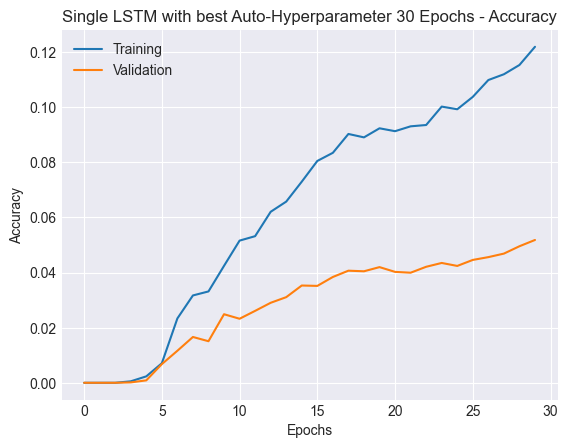

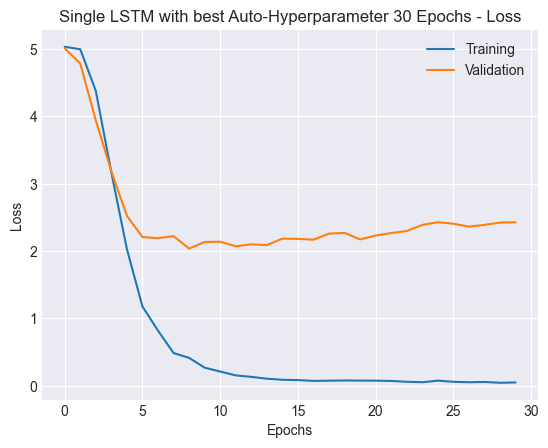

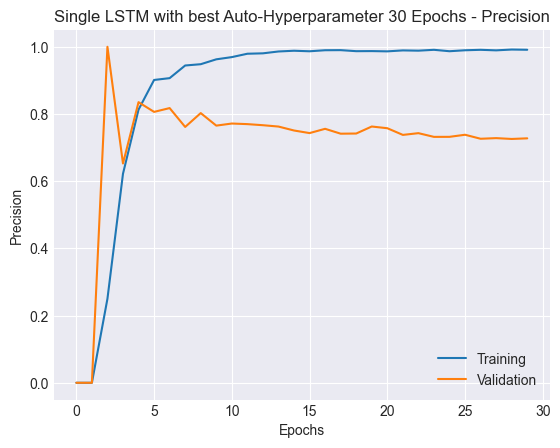

<Figure size 640x480 with 0 Axes>

In [ ]:
# single lstm model with tuned hyperparamter
hp_lstm_model_30 = train_lstm.single_lstm_model(embedding_seq_length=110,
                                                lstm_units=35,
                                                rate=0.275,
                                                activation="elu",
                                                optimizer="Nadam",
                                                lr=0.007121072966581653,
                                                num_class=preprocess.num_intent,
                                                vocab_size=VOCAB_SIZE,
                                                textvector_layer=textvector_layer)

# fitting the single lstm model to full original dataset
hp_lstm_history_30 = train_lstm.model_history(x=x_train, y=y_train,
                                              x_val=x_val,
                                              y_val=y_val,
                                              path=single_lstm_path,
                                              model=hp_lstm_model_30,
                                              batch_size=192,
                                              epochs=30,
                                              filename="hp_192Batch_30epochs")
# plottiing the mertics
train_lstm.plot(history=hp_lstm_history_30,
                title="Single LSTM with best Auto-Hyperparameter 30 Epochs",
                path=os.path.join(valuation_path, "Single_LSTM"))

Training the Single Layer LSTM Model with best Auto-Hyperparameter with 30 Epochs

Epoch 1/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - accuracy: 0.0000e+00 - f1_score: 0.0030 - loss: 5.0274 - precision: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_f1_score: 9.6096e-05 - val_loss: 5.0134 - val_precision: 0.0000e+00
Epoch 2/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.0000e+00 - f1_score: 0.0048 - loss: 5.0111 - precision: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0012 - val_loss: 4.7868 - val_precision: 0.0000e+00
Epoch 3/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 4.4100e-07 - f1_score: 0.0100 - loss: 4.5862 - precision: 0.0642 - val_accuracy: 2.2222e-06 - val_f1_score: 0.0438 - val_loss: 3.9416 - val_precision: 1.0000
Epoch 4/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 3.0263e-04 - f1_score: 0.0966 - loss: 3.4378 - precision: 0.5189 - val_accuracy: 1.4000e-04 - val_f1_score: 0.2262 - val_loss: 3.1855 - val_precision: 0.6526
Epoch 5/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.0018 - f1_score: 0.3530 - loss:

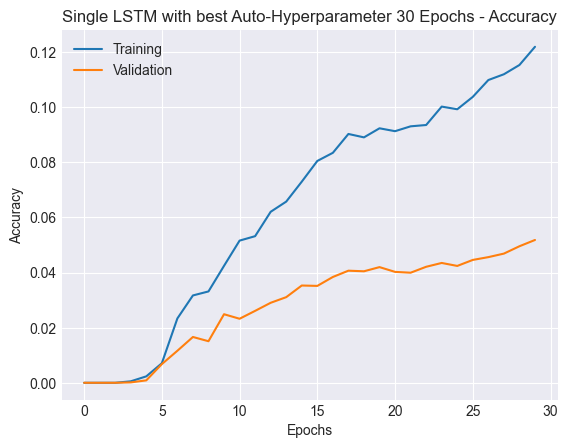

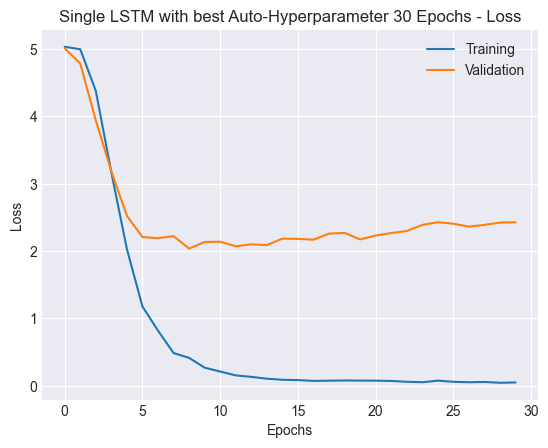

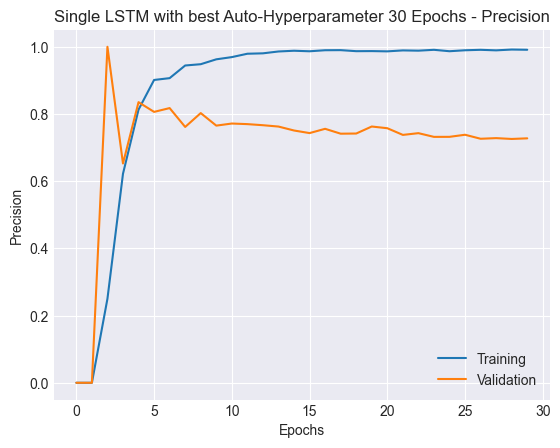

<Figure size 640x480 with 0 Axes>

In [ ]:
# single lstm model with tuned hyperparamter
hp_lstm_model_30 = train_lstm.single_lstm_model(embedding_seq_length=110,
                                                lstm_units=35,
                                                rate=0.275,
                                                activation="elu",
                                                optimizer="Nadam",
                                                lr=0.007121072966581653,
                                                num_class=preprocess.num_intent,
                                                vocab_size=VOCAB_SIZE,
                                                textvector_layer=textvector_layer)

# fitting the single lstm model to full original dataset
hp_lstm_history_30 = train_lstm.model_history(x=x_train, y=y_train,
                                              x_val=x_val,
                                              y_val=y_val,
                                              path=single_lstm_path,
                                              model=hp_lstm_model_30,
                                              batch_size=192,
                                              epochs=30,
                                              filename="hp_192Batch_30epochs")
# plottiing the mertics
train_lstm.plot(history=hp_lstm_history_30,
                title="Single LSTM with best Auto-Hyperparameter 30 Epochs",
                path=os.path.join(valuation_path, "Single_LSTM"))

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 37s 73ms/step - accuracy: 0.6024 - f1_score: 0.0060 - loss: 35042532.0000 - precision: 0.0094 - val_accuracy: 0.9866 - val_f1_score: 0.0038 - val_loss: 70258.9609 - val_precision: 0.0067
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 74ms/step - accuracy: 0.9867 - f1_score: 0.0037 - loss: 234686048.0000 - precision: 0.0043 - val_accuracy: 0.9865 - val_f1_score: 0.0036 - val_loss: 61325.3594 - val_precision: 0.0053
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 70ms/step - accuracy: 0.9867 - f1_score: 0.0056 - loss: 3273808384.0000 - precision: 0.0064 - val_accuracy: 0.9867 - val_f1_score: 0.0030 - val_loss: 165341.3594 - val_precision: 0.0060
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 61ms/step - accuracy: 0.9868 - f1_score: 0.0065 - loss: 4711592448.0000 - precision: 0.0085 - val_accuracy: 0.9865 - val_f1_score: 0.0068 - val_loss: 88724.2109 - val_precision: 0.0087
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 61ms/step - accuracy: 0.9867 - f1_score: 0

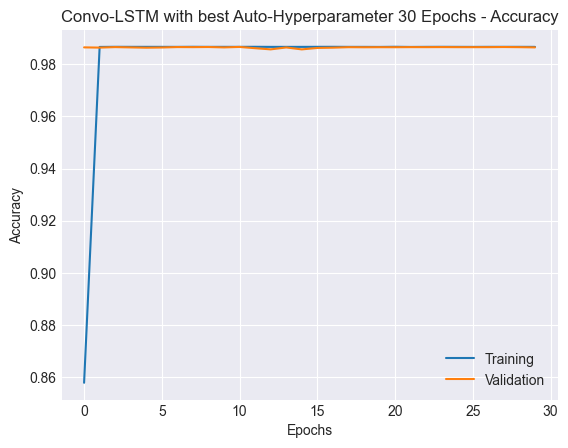

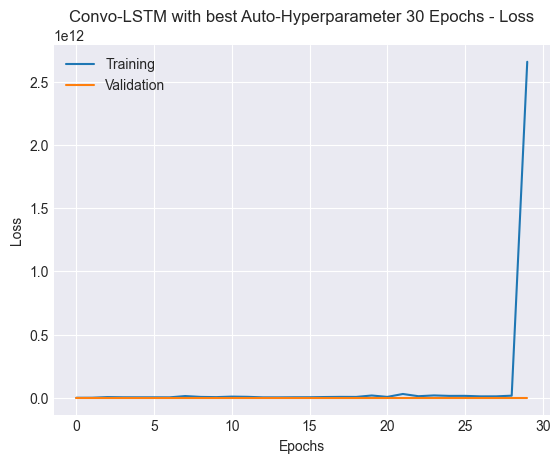

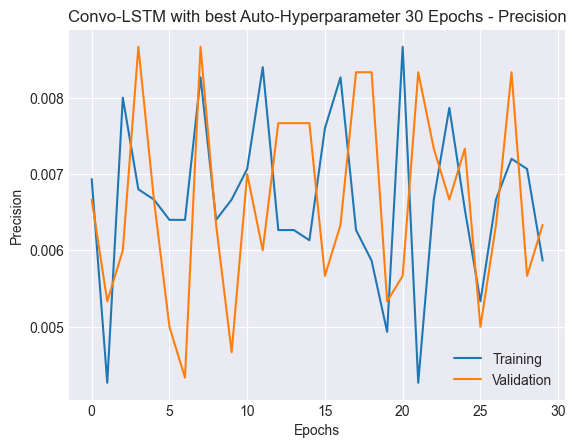

<Figure size 640x480 with 0 Axes>

In [ ]:
# convo lstm model with tuned hyperparamter
hp_convo_model_30 = train_lstm.convo_lstm_model(embedding_seq_length=150,
                                                convo_filters=320,
                                                convo_rate=0.675,
                                                kernel_size=3,
                                                convo_activation="elu",
                                                lstm_units=145,
                                                lstm_rate=0.5,
                                                lstm_activation="elu",
                                                optimizer="Adam",
                                                lr=0.009372089740136636,
                                                num_class=preprocess.num_intent,
                                                vocab_size=VOCAB_SIZE,
                                                textvector_layer=textvector_layer)

# fitting the single lstm model to full original dataset
hp_convo_history_30 = train_lstm.model_history(x=x_train, y=y_train,
                                               x_val=x_val,
                                               y_val=y_val,
                                               path=convo_lstm_path,
                                               model=hp_convo_model_30,
                                               batch_size=16,
                                               epochs=30,
                                               filename="hp_16Batch_30epochs")
# plottiing the mertics
train_lstm.plot(history=hp_convo_history_30,
                title="Convo-LSTM with best Auto-Hyperparameter 30 Epochs",
                path=os.path.join(valuation_path, "Convo_LSTM"))

In [35]:
# displaying the model summary
hp_lstm_model_30.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization              │ (None, 25)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 25, 110)        │     5,500,220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 35)             │        20,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 35)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 150)            │         5,400 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,578,183 (63.24 MB)

 Trainable params: 5,526,060 (21.08 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,052,123 (42.16 MB)

In [36]:
# evaluating the model with test dataset
hp_lstm_model_30_evaluate = hp_lstm_model_30.evaluate(
    x=x_test, y=y_test, verbose=1)

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0626 - f1_score: 0.3523 - loss: 2.2680 - precision: 0.7273


Training the Single Layer LSTM Model with best Auto-Hyperparameter with 50 Epochs

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - accuracy: 5.6668e-04 - f1_score: 0.0021 - loss: 5.1202 - precision: 0.0115 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0028 - val_loss: 4.9716 - val_precision: 0.0000e+00
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.0000e+00 - f1_score: 0.0054 - loss: 4.8420 - precision: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0057 - val_loss: 4.4757 - val_precision: 0.0000e+00
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.0000e+00 - f1_score: 0.0233 - loss: 4.3031 - precision: 0.6895 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0564 - val_loss: 4.0887 - val_precision: 0.0000e+00
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 6.5075e-08 - f1_score: 0.1008 - loss: 3.5648 - precision: 0.6116 - val_accuracy: 4.4444e-06 - val_f1_score: 0.2202 - val_loss: 3.2923 - val_precision: 0.9000
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 1.6251e-04 - f1_score: 0.3890 - loss:

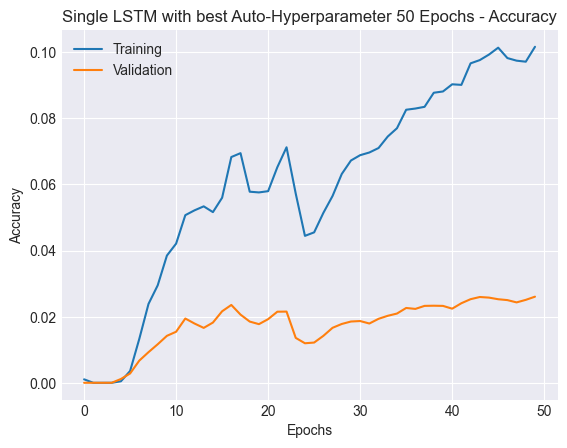

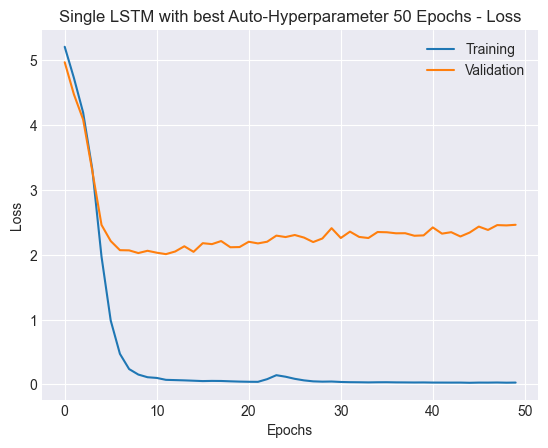

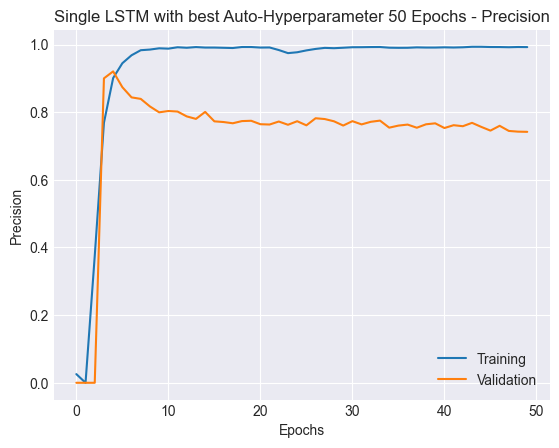

<Figure size 640x480 with 0 Axes>

In [37]:
# single lstm model with tuned hyperparamter
hp_lstm_model_50 = train_lstm.single_lstm_model(embedding_seq_length=110,
                                                lstm_units=35,
                                                rate=0.275,
                                                activation="elu",
                                                optimizer="Nadam",
                                                lr=0.007121072966581653,
                                                num_class=preprocess.num_intent,
                                                vocab_size=VOCAB_SIZE,
                                                textvector_layer=textvector_layer)

# fitting the single lstm model to full original dataset
hp_lstm_history_50 = train_lstm.model_history(x=x_train, y=y_train,
                                              x_val=x_val,
                                              y_val=y_val,
                                              path=single_lstm_path,
                                              model=hp_lstm_model_50,
                                              batch_size=192,
                                              epochs=50,
                                              filename="hp_192Batch_50epochs")
# plottiing the mertics
train_lstm.plot(history=hp_lstm_history_50,
                title="Single LSTM with best Auto-Hyperparameter 50 Epochs",
                path=os.path.join(valuation_path, "Single_LSTM"))

In [38]:
# displaying the model summary
hp_lstm_model_50.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization              │ (None, 25)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 25, 110)        │     5,500,220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 35)             │        20,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 35)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 150)            │         5,400 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,578,183 (63.24 MB)

 Trainable params: 5,526,060 (21.08 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,052,123 (42.16 MB)

In [ ]:
# evaluating the model with test dataset
hp_lstm_model_50_evaluate = hp_lstm_model_50.evaluate(
    x=x_test, y=y_test, verbose=1)

141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0305 - f1_score: 0.3499 - loss: 2.4281 - precision: 0.7191


Training the Single Layer LSTM Model with best Auto-Hyperparameter with 75 epochs

Epoch 1/75
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - accuracy: 3.0713e-05 - f1_score: 0.0019 - loss: 5.0229 - precision: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0017 - val_loss: 5.0245 - val_precision: 0.0000e+00
Epoch 2/75
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 4.4751e-05 - f1_score: 0.0040 - loss: 5.0251 - precision: 0.4610 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0090 - val_loss: 4.9830 - val_precision: 0.0000e+00
Epoch 3/75
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 5.8256e-05 - f1_score: 0.0116 - loss: 4.8082 - precision: 0.1267 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0265 - val_loss: 4.1138 - val_precision: 1.0000
Epoch 4/75
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 6.0232e-05 - f1_score: 0.0666 - loss: 3.5887 - precision: 0.4510 - val_accuracy: 0.0000e+00 - val_f1_score: 0.1337 - val_loss: 3.4478 - val_precision: 0.8689
Epoch 5/75
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 0.0014 - f1_score: 0.2166 - loss: 2.5671 

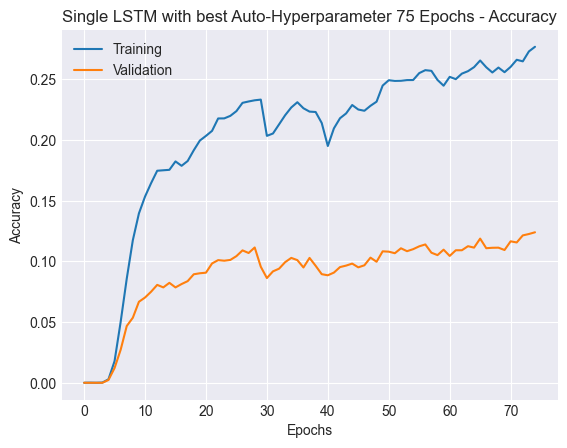

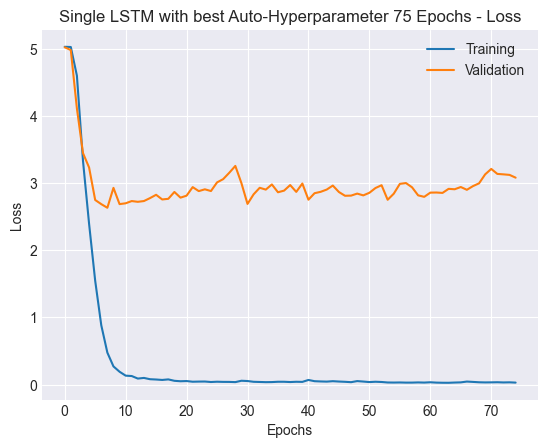

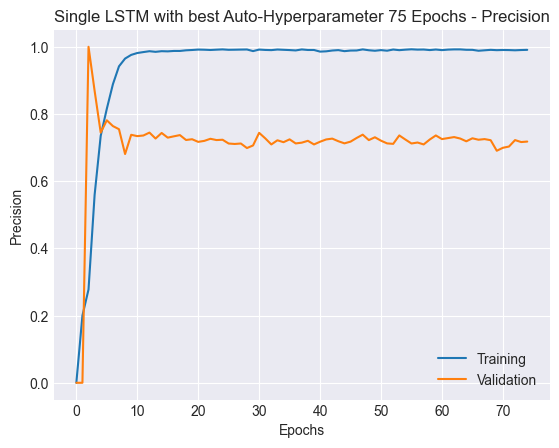

<Figure size 640x480 with 0 Axes>

In [40]:
# single lstm model with tuned hyperparamter
hp_lstm_model_75 = train_lstm.single_lstm_model(embedding_seq_length=110,
                                                lstm_units=35,
                                                rate=0.275,
                                                activation="elu",
                                                optimizer="Nadam",
                                                lr=0.007121072966581653,
                                                num_class=preprocess.num_intent,
                                                vocab_size=VOCAB_SIZE,
                                                textvector_layer=textvector_layer)

# fitting the single lstm model to full original dataset
hp_lstm_history_75 = train_lstm.model_history(x=x_train, y=y_train,
                                              x_val=x_val,
                                              y_val=y_val,
                                              path=single_lstm_path,
                                              model=hp_lstm_model_75,
                                              batch_size=192,
                                              epochs=75,
                                              filename="hp_192Batch_75epochs")

train_lstm.plot(history=hp_lstm_history_75,
                title="Single LSTM with best Auto-Hyperparameter 75 Epochs",
                path=os.path.join(valuation_path, "Single_LSTM"))

In [41]:
# displaying the model summary
hp_lstm_model_75.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization              │ (None, 25)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 25, 110)        │     5,500,220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 35)             │        20,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 35)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 150)            │         5,400 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,578,183 (63.24 MB)

 Trainable params: 5,526,060 (21.08 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,052,123 (42.16 MB)

In [ ]:
# evaluating the model with test dataset
hp_lstm_model_75_evaluate = hp_lstm_model_75.evaluate(
    x=x_test, y=y_test, verbose=1)

141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1363 - f1_score: 0.3599 - loss: 3.2038 - precision: 0.7166


Training the Stacked LSTM Model with best Auto-Hyperparameter with 30 epochs

In [19]:
# stacked lstm path for
stacked_lstm_path = os.path.join(hp_path, "Stacked_lstm")

Epoch 1/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 14s 202ms/step - accuracy: 0.0000e+00 - f1_score: 0.0046 - loss: 5.0675 - precision: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_f1_score: 6.3302e-04 - val_loss: 4.9015 - val_precision: 0.0000e+00
Epoch 2/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 7s 171ms/step - accuracy: 0.0043 - f1_score: 0.0034 - loss: 228.7269 - precision: 1.4903e-04 - val_accuracy: 0.7380 - val_f1_score: 0.0016 - val_loss: 14250.7734 - val_precision: 0.0116
Epoch 3/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 7s 170ms/step - accuracy: 0.8908 - f1_score: 0.0067 - loss: 2469670.7500 - precision: 0.0082 - val_accuracy: 0.9623 - val_f1_score: 0.0047 - val_loss: 4274.9434 - val_precision: 0.0067
Epoch 4/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 7s 159ms/step - accuracy: 0.9498 - f1_score: 0.0044 - loss: 4393005.5000 - precision: 0.0052 - val_accuracy: 0.2386 - val_f1_score: 0.0025 - val_loss: 158.9131 - val_precision: 0.0106
Epoch 5/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 7s 161ms/step - accuracy: 0.5909 - f1_score: 0.0073 - loss

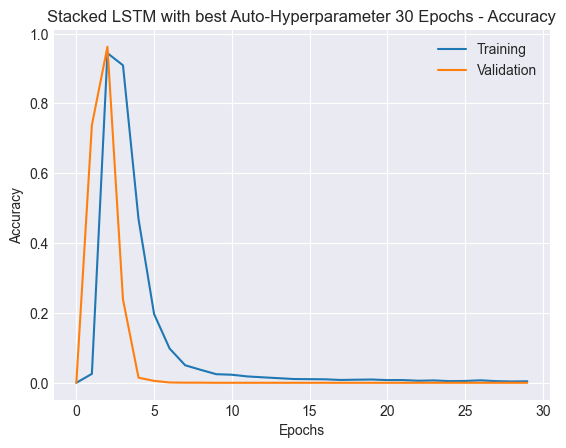

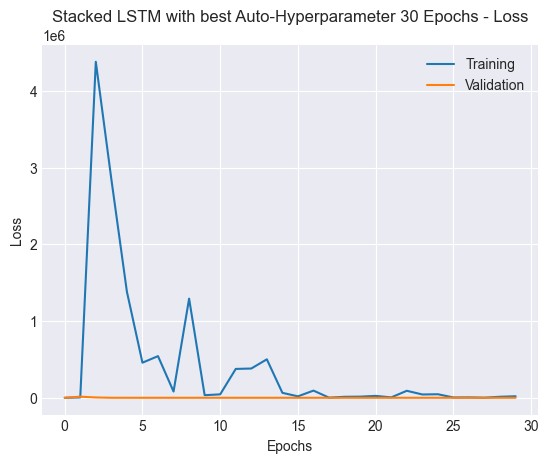

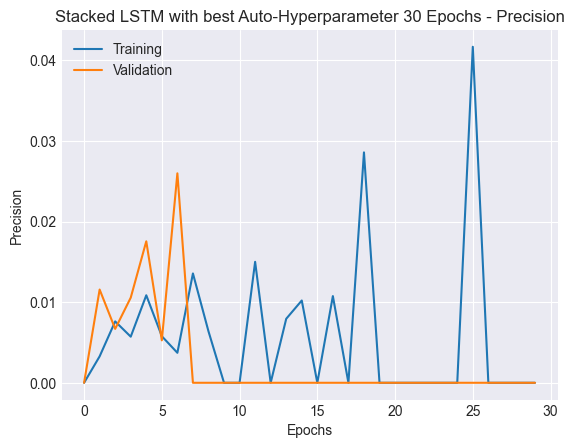

<Figure size 640x480 with 0 Axes>

In [44]:
# single lstm model with tuned hyperparamter
hp_stacked_model_30 = train_lstm.stacked_lstm_model(embedding_seq_length=110,
                                                    lstm_units1=110,
                                                    lstm_units2=140,
                                                    rate1=0.525,
                                                    rate2=0.325,
                                                    activation="selu",
                                                    optimizer="Nadam",
                                                    lr=0.00956634035983909,
                                                    num_class=preprocess.num_intent,
                                                    vocab_size=VOCAB_SIZE,
                                                    textvector_layer=textvector_layer)

# fitting the single lstm model to full original dataset
hp_stacked_history_30 = train_lstm.model_history(x=x_train, y=y_train,
                                                 x_val=x_val,
                                                 y_val=y_val,
                                                 path=stacked_lstm_path,
                                                 model=hp_stacked_model_30,
                                                 batch_size=176,
                                                 epochs=30,
                                                 filename="hp_176Batch_30epochs")
# plottiing the mertics
train_lstm.plot(history=hp_stacked_history_30,
                title="Stacked LSTM with best Auto-Hyperparameter 30 Epochs",
                path=os.path.join(valuation_path, "Stacked_LSTM"))

In [45]:
# displaying the model summary
hp_stacked_model_30.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization              │ (None, 25)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 25, 110)        │     5,500,220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 25, 110)        │        97,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 140)            │       140,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 140)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 150)            │        21,150 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,277,513 (65.91 MB)

 Trainable params: 5,759,170 (21.97 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,518,343 (43.94 MB)

In [46]:
# evaluating the model with test dataset
hp_stacked_model_30_evaluate = hp_stacked_model_30.evaluate(
    x=x_test, y=y_test, verbose=1)

141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.0000e+00 - f1_score: 0.0030 - loss: 5.4085 - precision: 0.0000e+00


Training the Stacked LSTM Model with best Auto-Hyperparameter with 50 epochs

Epoch 1/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 12s 180ms/step - accuracy: 0.0000e+00 - f1_score: 0.0029 - loss: 5.0705 - precision: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_f1_score: 2.0586e-04 - val_loss: 5.0109 - val_precision: 0.0000e+00
Epoch 2/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 7s 169ms/step - accuracy: 1.4761e-04 - f1_score: 0.0031 - loss: 5.1538 - precision: 0.0000e+00 - val_accuracy: 0.0192 - val_f1_score: 0.0012 - val_loss: 13.1639 - val_precision: 0.0071
Epoch 3/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 7s 167ms/step - accuracy: 0.4381 - f1_score: 0.0062 - loss: 835163.3125 - precision: 0.0092 - val_accuracy: 0.9867 - val_f1_score: 0.0030 - val_loss: 2468694.2500 - val_precision: 0.0070
Epoch 4/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 148ms/step - accuracy: 0.9868 - f1_score: 0.0069 - loss: 235567136.0000 - precision: 0.0082 - val_accuracy: 0.9867 - val_f1_score: 0.0038 - val_loss: 212793.3438 - val_precision: 0.0100
Epoch 5/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 151ms/step - accuracy: 0.9821 - f1_score: 0.0058 

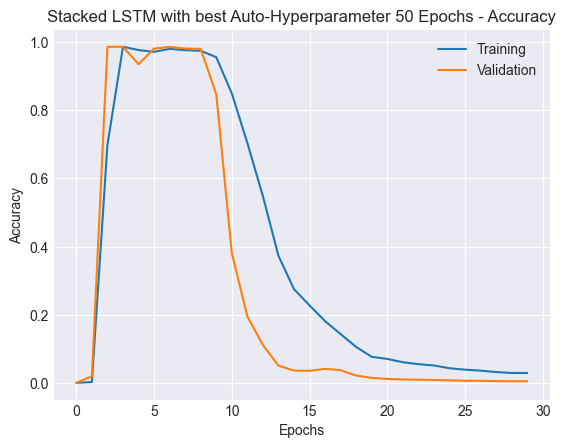

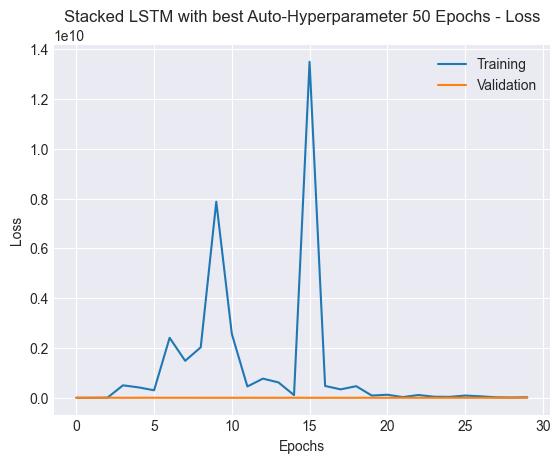

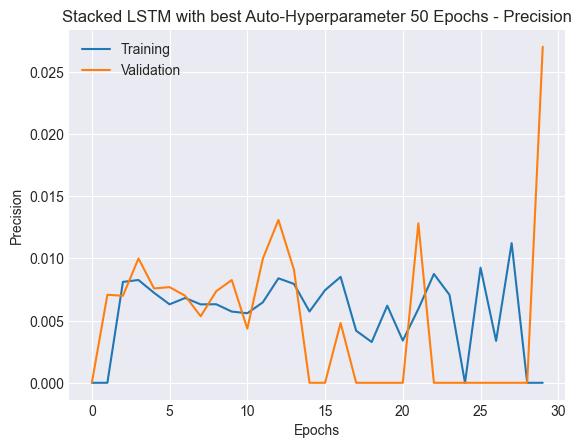

<Figure size 640x480 with 0 Axes>

In [47]:
# single lstm model with tuned hyperparamter
hp_stacked_model_50 = train_lstm.stacked_lstm_model(embedding_seq_length=110,
                                                    lstm_units1=110,
                                                    lstm_units2=140,
                                                    rate1=0.525,
                                                    rate2=0.325,
                                                    activation="selu",
                                                    optimizer="Nadam",
                                                    lr=0.00956634035983909,
                                                    num_class=preprocess.num_intent,
                                                    vocab_size=VOCAB_SIZE,
                                                    textvector_layer=textvector_layer)

# fitting the single lstm model to full original dataset
hp_stacked_history_50 = train_lstm.model_history(x=x_train, y=y_train,
                                                 x_val=x_val,
                                                 y_val=y_val,
                                                 path=stacked_lstm_path,
                                                 model=hp_stacked_model_50,
                                                 batch_size=176,
                                                 epochs=30,
                                                 filename="hp_176Batch_50epochs")
# plottiing the mertics
train_lstm.plot(history=hp_stacked_history_50,
                title="Stacked LSTM with best Auto-Hyperparameter 50 Epochs",
                path=os.path.join(valuation_path, "Stacked_LSTM"))

In [48]:
# evaluating the model with test dataset
hp_stacked_model_50_evaluate = hp_stacked_model_50.evaluate(
    x=x_test, y=y_test, verbose=1)

141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.0047 - f1_score: 0.0043 - loss: 7.0156 - precision: 0.0000e+00


Training the Convo-LSTM Model with best Auto-Hyperparameter with 30 epochs

In [12]:
# convo lstm path for
convo_lstm_path = os.path.join(hp_path, "Convo_lstm")

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 37s 73ms/step - accuracy: 0.6024 - f1_score: 0.0060 - loss: 35042532.0000 - precision: 0.0094 - val_accuracy: 0.9866 - val_f1_score: 0.0038 - val_loss: 70258.9609 - val_precision: 0.0067
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 74ms/step - accuracy: 0.9867 - f1_score: 0.0037 - loss: 234686048.0000 - precision: 0.0043 - val_accuracy: 0.9865 - val_f1_score: 0.0036 - val_loss: 61325.3594 - val_precision: 0.0053
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 70ms/step - accuracy: 0.9867 - f1_score: 0.0056 - loss: 3273808384.0000 - precision: 0.0064 - val_accuracy: 0.9867 - val_f1_score: 0.0030 - val_loss: 165341.3594 - val_precision: 0.0060
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 61ms/step - accuracy: 0.9868 - f1_score: 0.0065 - loss: 4711592448.0000 - precision: 0.0085 - val_accuracy: 0.9865 - val_f1_score: 0.0068 - val_loss: 88724.2109 - val_precision: 0.0087
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 61ms/step - accuracy: 0.9867 - f1_score: 0

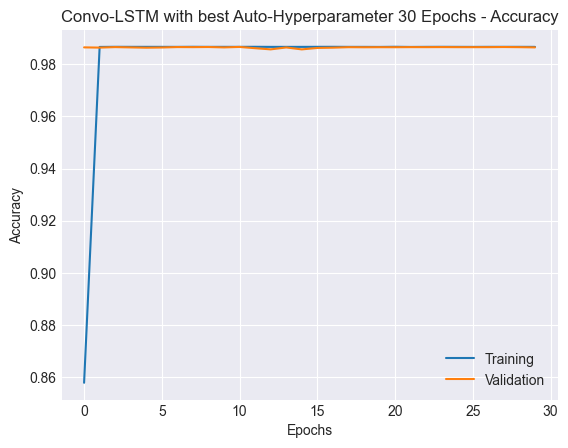

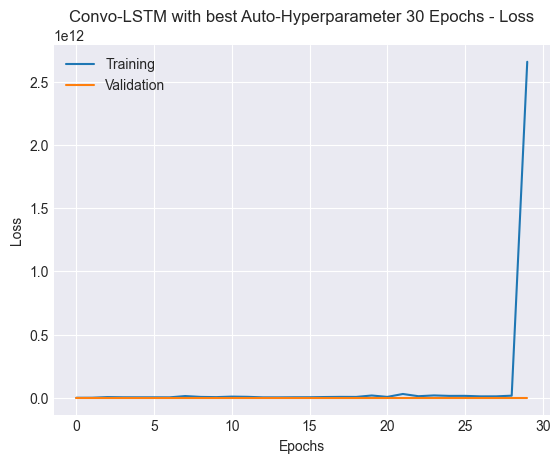

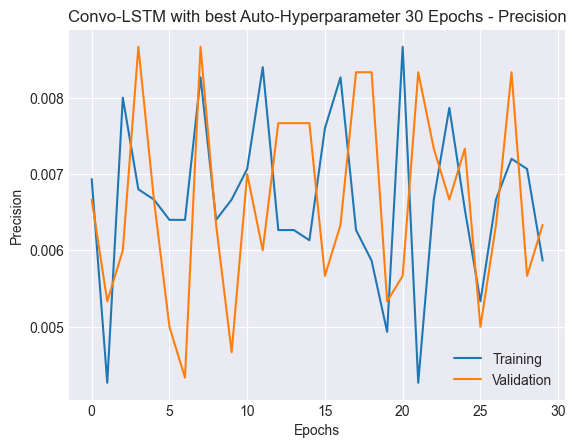

<Figure size 640x480 with 0 Axes>

In [ ]:
# convo lstm model with tuned hyperparamter
hp_convo_model_30 = train_lstm.convo_lstm_model(embedding_seq_length=150,
                                                convo_filters=320,
                                                convo_rate=0.675,
                                                kernel_size=3,
                                                convo_activation="elu",
                                                lstm_units=145,
                                                lstm_rate=0.5,
                                                lstm_activation="elu",
                                                optimizer="Adam",
                                                lr=0.009372089740136636,
                                                num_class=preprocess.num_intent,
                                                vocab_size=VOCAB_SIZE,
                                                textvector_layer=textvector_layer)

# fitting the single lstm model to full original dataset
hp_convo_history_30 = train_lstm.model_history(x=x_train, y=y_train,
                                               x_val=x_val,
                                               y_val=y_val,
                                               path=convo_lstm_path,
                                               model=hp_convo_model_30,
                                               batch_size=16,
                                               epochs=30,
                                               filename="hp_16Batch_30epochs")
# plottiing the mertics
train_lstm.plot(history=hp_convo_history_30,
                title="Convo-LSTM with best Auto-Hyperparameter 30 Epochs",
                path=os.path.join(valuation_path, "Convo_LSTM"))

In [15]:
# displaying the model summary
hp_convo_model_30.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization              │ (None, 25)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 25, 150)        │     7,500,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 25, 320)        │       144,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 25, 320)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 145)            │       270,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 145)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 150)            │        21,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,810,402 (90.83 MB)

 Trainable params: 7,936,800 (30.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,873,602 (60.55 MB)

In [17]:
# evaluating the model with test dataset
hp_convo_model_30_evaluate = hp_convo_model_30.evaluate(x=x_test, y=y_test, verbose=1)

141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9865 - f1_score: 0.0037 - loss: 172813.5000 - precision: 0.0093


Training the Stacked LSTM Model with different Hyperparameter

Epoch 1/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - accuracy: 0.0000e+00 - f1_score: 0.0014 - loss: 5.0102 - precision: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0027 - val_loss: 4.8320 - val_precision: 0.0000e+00
Epoch 2/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.0000e+00 - f1_score: 0.0043 - loss: 4.7034 - precision: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0030 - val_loss: 4.4369 - val_precision: 0.0000e+00
Epoch 3/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - accuracy: 0.0000e+00 - f1_score: 0.0073 - loss: 4.4177 - precision: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0059 - val_loss: 4.3616 - val_precision: 0.0000e+00
Epoch 4/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - accuracy: 0.0000e+00 - f1_score: 0.0137 - loss: 4.3003 - precision: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0071 - val_loss: 4.2304 - val_precision: 0.0000e+00
Epoch 5/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - accuracy: 0.0000e+00 

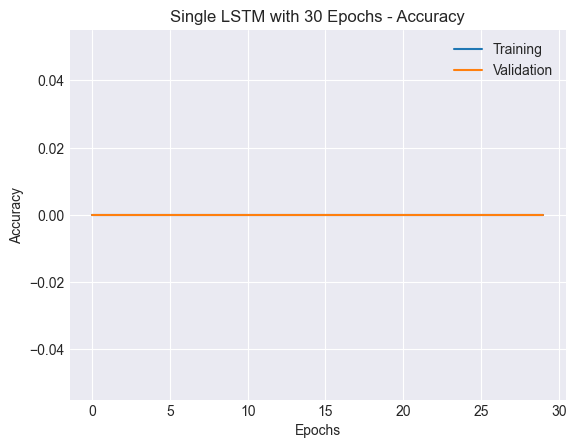

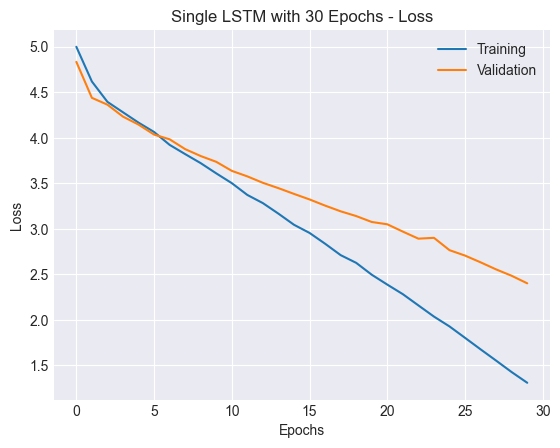

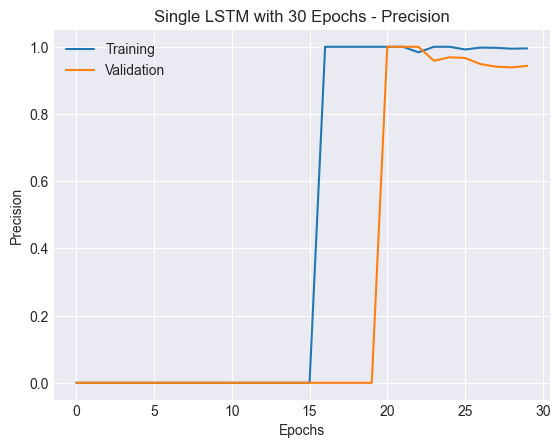

141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.0000e+00 - f1_score: 0.2719 - loss: 2.2825 - precision: 0.8646


<Figure size 640x480 with 0 Axes>

In [ ]:
# single lstm model with tuned hyperparamter
lstm_model_30 = train_lstm.single_lstm_model(embedding_seq_length=110,
                                             lstm_units=30,
                                             rate=0.275,
                                             activation="tanh",
                                             optimizer="Adam",
                                             lr=0.001,
                                             num_class=preprocess.num_intent,
                                             vocab_size=VOCAB_SIZE,
                                             textvector_layer=textvector_layer)

# fitting the single lstm model to full original dataset
lstm_history_30 = train_lstm.model_history(x=x_train, y=y_train,
                                           x_val=x_val,
                                           y_val=y_val,
                                           path=single_lstm_path,
                                           model=lstm_model_30,
                                           batch_size=64,
                                           epochs=30,
                                           filename="64Batch_30epochs")
# plottiing the mertics
train_lstm.plot(history=lstm_history_30,
                title="Single LSTM with 30 Epochs",
                path=os.path.join(valuation_path, "Single_LSTM"))

# evaluating the model with test dataset
lstm_model_30_evaluate = lstm_model_30.evaluate(x=x_test, 
                                                y=y_test, 
                                                verbose=1)

Epoch 1/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - accuracy: 0.0000e+00 - f1_score: 0.0017 - loss: 5.0113 - precision: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0035 - val_loss: 4.9499 - val_precision: 0.0000e+00
Epoch 2/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - accuracy: 1.5269e-05 - f1_score: 0.0047 - loss: 4.8568 - precision: 0.1319 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0056 - val_loss: 4.6026 - val_precision: 0.0000e+00
Epoch 3/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 2.6890e-05 - f1_score: 0.0088 - loss: 4.5280 - precision: 0.1978 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0127 - val_loss: 4.3930 - val_precision: 0.0000e+00
Epoch 4/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.0000e+00 - f1_score: 0.0152 - loss: 4.3029 - precision: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0128 - val_loss: 4.1323 - val_precision: 0.0000e+00
Epoch 5/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 1.6756e-04 - f1_sco

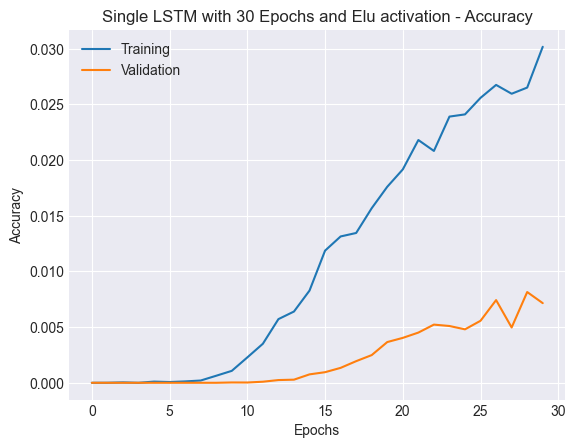

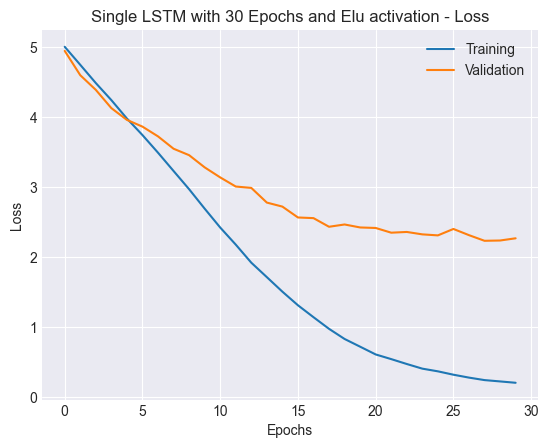

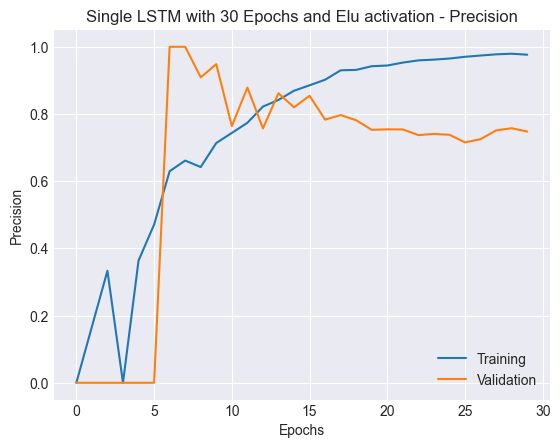

141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.0030 - f1_score: 0.3251 - loss: 2.3292 - precision: 0.7238


<Figure size 640x480 with 0 Axes>

In [28]:
# single lstm model with hyperparamter
lstm_model_30_elu = train_lstm.single_lstm_model(embedding_seq_length=110,
                                                 lstm_units=30,
                                                 rate=0.275,
                                                 activation="elu",
                                                 optimizer="Adam",
                                                 lr=0.001,
                                                 num_class=preprocess.num_intent,
                                                 vocab_size=VOCAB_SIZE,
                                                 textvector_layer=textvector_layer)

# fitting the single lstm model to full original dataset
lstm_history_30_elu = train_lstm.model_history(x=x_train, y=y_train,
                                               x_val=x_val,
                                               y_val=y_val,
                                               path=single_lstm_path,
                                               model=lstm_model_30_elu,
                                               batch_size=64,
                                               epochs=30,
                                               filename="64Batch_30epochs_elu")
# plottiing the mertics
train_lstm.plot(history=lstm_history_30_elu,
                title="Single LSTM with 30 Epochs and Elu activation",
                path=os.path.join(valuation_path, "Single_LSTM"))

# evaluating the model with test dataset
lstm_model_30_elu_eluevaluate = lstm_model_30_elu.evaluate(
    x=x_test, y=y_test, verbose=1)

Epoch 1/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 17s 82ms/step - accuracy: 0.0000e+00 - f1_score: 0.0015 - loss: 5.0114 - precision: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0060 - val_loss: 4.9960 - val_precision: 0.0000e+00
Epoch 2/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - accuracy: 0.0000e+00 - f1_score: 0.0070 - loss: 4.8402 - precision: 0.2008 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0169 - val_loss: 4.4420 - val_precision: 0.0000e+00
Epoch 3/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 8s 66ms/step - accuracy: 0.0000e+00 - f1_score: 0.0159 - loss: 4.3578 - precision: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0461 - val_loss: 4.0941 - val_precision: 0.0000e+00
Epoch 4/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 8s 66ms/step - accuracy: 0.0000e+00 - f1_score: 0.0317 - loss: 4.0264 - precision: 0.2100 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0706 - val_loss: 3.8470 - val_precision: 0.0000e+00
Epoch 5/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 8s 66ms/step - accuracy: 0.0000e+00 - f1_sc

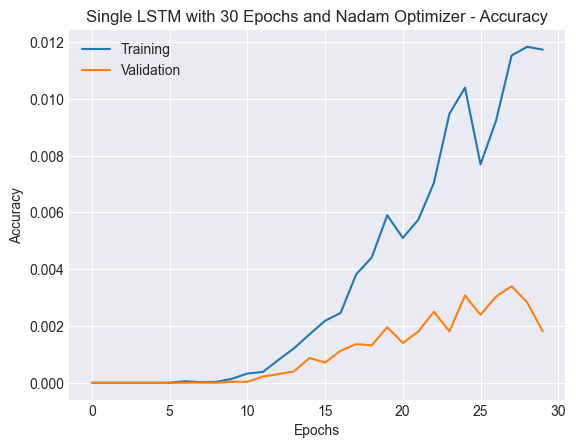

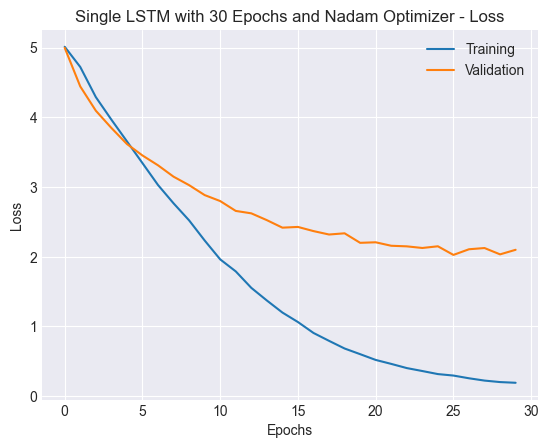

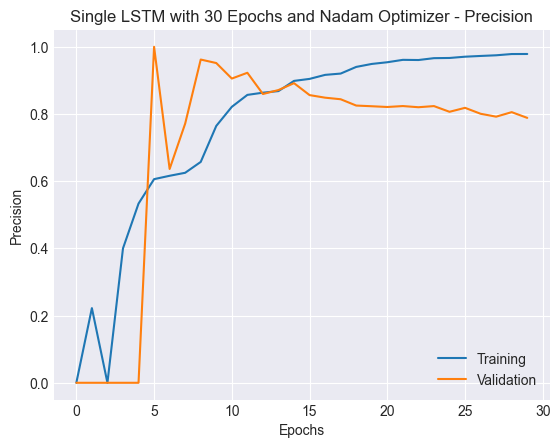

141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.0013 - f1_score: 0.3468 - loss: 2.1912 - precision: 0.7796


<Figure size 640x480 with 0 Axes>

In [29]:
# single lstm model with hyperparamter
lstm_model_30_nadam = train_lstm.single_lstm_model(embedding_seq_length=110,
                                                 lstm_units=30,
                                                 rate=0.275,
                                                 activation="elu",
                                                 optimizer="Nadam",
                                                 lr=0.001,
                                                 num_class=preprocess.num_intent,
                                                 vocab_size=VOCAB_SIZE,
                                                 textvector_layer=textvector_layer)

# fitting the single lstm model to full original dataset
lstm_history_30_nadam = train_lstm.model_history(x=x_train, y=y_train,
                                               x_val=x_val,
                                               y_val=y_val,
                                               path=single_lstm_path,
                                               model=lstm_model_30_nadam,
                                               batch_size=64,
                                               epochs=30,
                                               filename="64Batch_30epochs_Nadam")
# plottiing the mertics
train_lstm.plot(history=lstm_history_30_nadam,
                title="Single LSTM with 30 Epochs and Nadam Optimizer",
                path=os.path.join(valuation_path, "Single_LSTM"))

# evaluating the model with test dataset
lstm_model_30_nadam_eluevaluate = lstm_model_30_nadam.evaluate(
    x=x_test, y=y_test, verbose=1)

Epoch 1/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 15s 75ms/step - accuracy: 0.0000e+00 - f1_score: 0.0021 - loss: 5.0119 - precision: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0014 - val_loss: 5.0061 - val_precision: 0.0000e+00
Epoch 2/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step - accuracy: 0.0000e+00 - f1_score: 0.0036 - loss: 4.8910 - precision: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0045 - val_loss: 4.5311 - val_precision: 0.0000e+00
Epoch 3/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step - accuracy: 0.0000e+00 - f1_score: 0.0092 - loss: 4.4920 - precision: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0205 - val_loss: 4.2112 - val_precision: 0.0000e+00
Epoch 4/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step - accuracy: 0.0000e+00 - f1_score: 0.0199 - loss: 4.1629 - precision: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0287 - val_loss: 3.9747 - val_precision: 0.0000e+00
Epoch 5/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - accuracy: 0.0000e+00

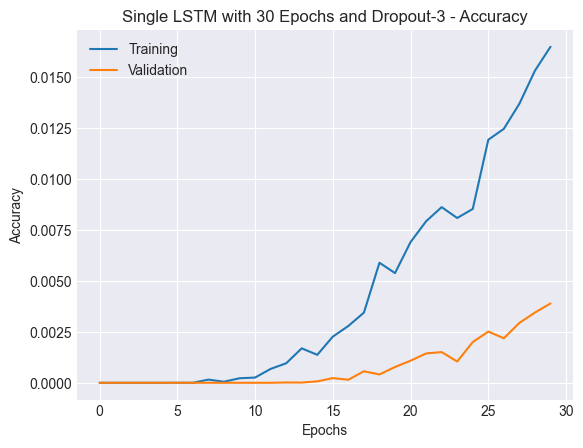

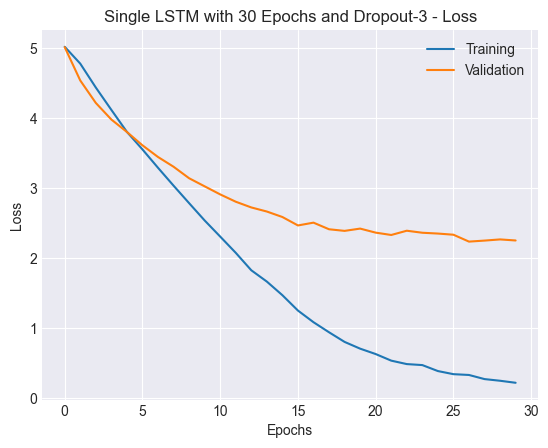

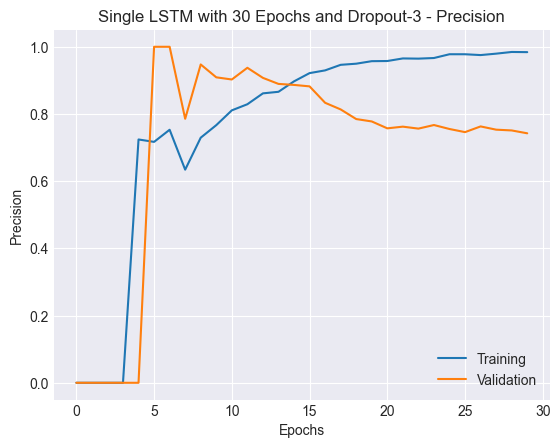

141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.0045 - f1_score: 0.3227 - loss: 2.2891 - precision: 0.7450


<Figure size 640x480 with 0 Axes>

In [30]:
# single lstm model with hyperparamter
lstm_model_rate = train_lstm.single_lstm_model(embedding_seq_length=110,
                                               lstm_units=30,
                                               rate=0.3,
                                               activation="elu",
                                               optimizer="Nadam",
                                               lr=0.001,
                                               num_class=preprocess.num_intent,
                                               vocab_size=VOCAB_SIZE,
                                               textvector_layer=textvector_layer)

# fitting the single lstm model to full original dataset
lstm_history_rate = train_lstm.model_history(x=x_train, y=y_train,
                                             x_val=x_val,
                                             y_val=y_val,
                                             path=single_lstm_path,
                                             model=lstm_model_rate,
                                             batch_size=64,
                                             epochs=30,
                                             filename="64Batch_30epochs_rate3")
# plottiing the mertics
train_lstm.plot(history=lstm_history_rate,
                title="Single LSTM with 30 Epochs and Dropout-3",
                path=os.path.join(valuation_path, "Single_LSTM"))

# evaluating the model with test dataset
lstm_model_rate_eluevaluate = lstm_model_rate.evaluate(
    x=x_test, y=y_test, verbose=1)

Augmenting Data Using Easy Data Augmentation(EDA)

In [ ]:
# combining the training and validation data for augmentation
original_data = pd.concat([preprocess.train_df, preprocess.val_df], ignore_index=True)

In [ ]:
augment_eda = eda.augment_data(data=original_data,
                               augment_size=[1, 2, 3, 4, 5, 10], 
                               path=r"D:\MScDataScience\7.Data_Science_Project\SourceCode\Agument\Augment_Data\EDA")